# # (Telecommunication Domain - Churn Prediction):

### * Importing the libraries *

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## (1). Importing the churn data-

In [3]:
telecom_churn = pd.read_csv(r"C:\Data\churn_dataset_ML\churn_dataset.csv")

telecom_churn.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
telecom_churn.shape

telecom_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
telecom_churn['TotalCharges']=telecom_churn['TotalCharges'].replace(' ',np.nan)
telecom_churn['TotalCharges'] = telecom_churn['TotalCharges'].astype('float')

telecom_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## (2). Data cleaning-

### (a). droping duplicates

In [6]:
telecom_churn.duplicated().sum()

telecom_churn.drop_duplicates(keep='first', inplace=True)

telecom_churn.duplicated().sum()

0

### (b). fixing null values

In [7]:
telecom_churn.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
telecom_churn.dropna(inplace=True)

telecom_churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### (c). outliers detection

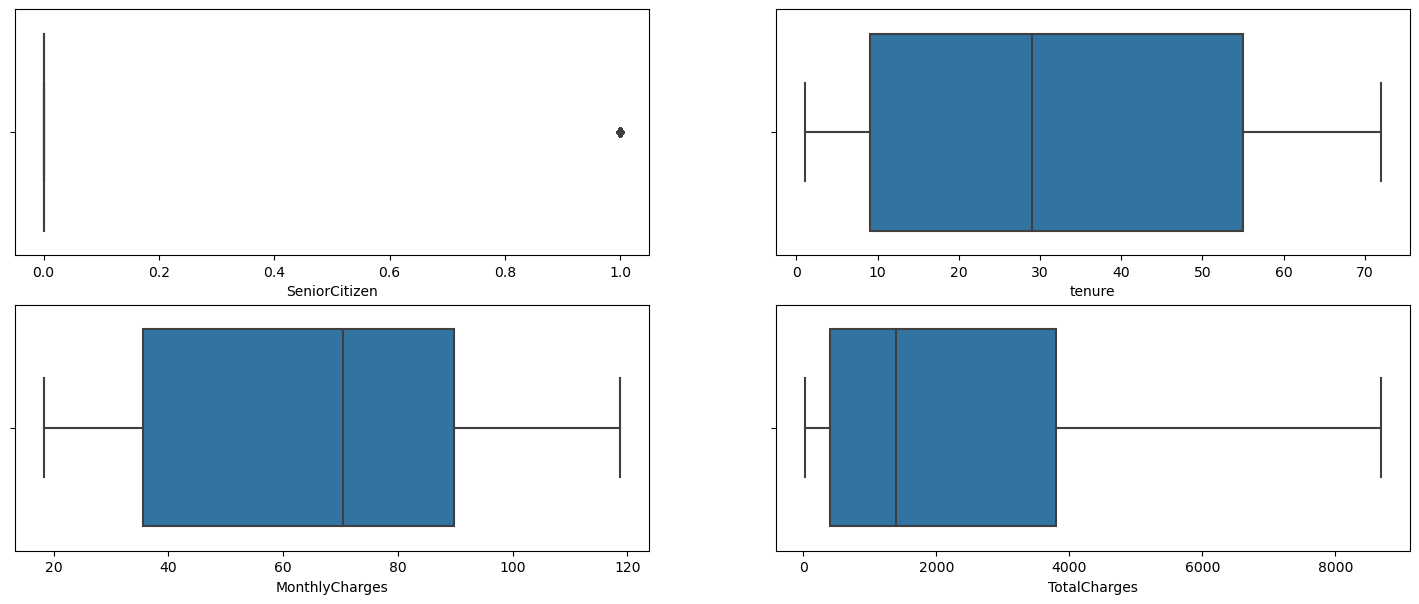

In [9]:
plt.figure(dpi=100, figsize=(18,15))

plt.subplot(421)
sns.boxplot(data=telecom_churn,x='SeniorCitizen')
            
plt.subplot(422)
sns.boxplot(data=telecom_churn,x='tenure')
            
plt.subplot(423)
sns.boxplot(data=telecom_churn,x='MonthlyCharges')
            
plt.subplot(424)
sns.boxplot(data=telecom_churn,x='TotalCharges');

In [10]:
telecom_churn.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [11]:
telecom_churn['Contract'] = telecom_churn['Contract'].astype(str)
telecom_churn['Contract'] = telecom_churn['Contract'].apply(lambda x: x.replace('-',' '))
telecom_churn.Contract.unique()

array(['Month to month', 'One year', 'Two year'], dtype=object)

In [12]:
telecom_churn.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [13]:
telecom_churn['PaymentMethod'] = telecom_churn['PaymentMethod'].astype(str)
telecom_churn['PaymentMethod'] = telecom_churn['PaymentMethod'].apply(lambda x: x.replace('(automatic)',''))
telecom_churn.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer ',
       'Credit card '], dtype=object)

## (3). Descrivtive stats-

In [14]:
telecom_churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


In [15]:
telecom_churn.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


## (4). Machine learning model problem statement:-

**Bulding a model which can predict the Churn of each costumers on the basic of their records in the telecom data set.**

  + **Target_variable is--->   `Churn.`**

In [16]:
telecom_churn.dtypes

(7032, 21)

In [17]:
telecom_churn.shape

(7032, 21)

## # Data Prepration:

### (a). Identify the Target Variable and Splitting the Data into Train and Test

In [18]:
# Identifying the input & output/target variable

X = telecom_churn[['gender','SeniorCitizen','Partner','Dependents','tenure','PhoneService','MultipleLines','InternetService',
                  'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract',
                  'PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges']]

y = telecom_churn['Churn']

In [19]:
y.head(10)

0     No
1     No
2    Yes
3     No
4    Yes
5    Yes
6     No
7     No
8    Yes
9     No
Name: Churn, dtype: object

In [20]:
X.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month to month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month to month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer,42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month to month,Yes,Electronic check,70.70,151.65
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month to month,Yes,Electronic check,99.65,820.50
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month to month,Yes,Credit card,89.10,1949.40
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month to month,No,Mailed check,29.75,301.90
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month to month,Yes,Electronic check,104.80,3046.05
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer,56.15,3487.95


### (b). Data-preprocessing

In [21]:
# Data-preprocessing: Train & Test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state= 0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5274, 19) (5274,)
(1758, 19) (1758,)


### (c). Separating Categorical and Numerical Columns

In [22]:
X_train.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [23]:
X_train_cat = X_train.select_dtypes(include=['object'])
X_train_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
3540,Female,Yes,Yes,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer
3504,Male,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer
6715,Female,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,No,Month to month,Yes,Electronic check
2866,Female,No,No,Yes,No,Fiber optic,No,Yes,No,No,No,Yes,Month to month,Yes,Electronic check
6609,Male,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month to month,Yes,Mailed check


In [24]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])
X_train_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
3540,0,72,108.65,7726.35
3504,0,68,19.95,1377.70
6715,0,11,89.20,990.30
2866,0,12,84.60,1017.35
6609,0,1,20.10,20.10


### (d). Scaling the Numerical Features

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num),   
                                    columns = X_train_num.columns,        
                                    index = X_train_num.index)

In [27]:
X_train_num_rescaled.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
3540,-0.436793,1.628149,1.460662,2.416469
3504,-0.436793,1.464856,-1.495682,-0.392705
6715,-0.436793,-0.862073,0.812400,-0.564123
2866,-0.436793,-0.821250,0.659083,-0.552154
6609,-0.436793,-1.270306,-1.490683,-0.993420


In [28]:
print("(A). Number of Numerical Features:", scaler.n_features_in_)
print("(B). Mean of each column:", scaler.mean_)
print("(C). Std of each column:", np.sqrt(scaler.var_))

(A). Number of Numerical Features: 4
(B). Mean of each column: [1.60219947e-01 3.21171786e+01 6.48253603e+01 2.26520067e+03]
(C). Std of each column: [3.66809917e-01 2.44958092e+01 3.00032663e+01 2.25997044e+03]


### (e). Applying OneHotEncoding on Categorical Columns

In [29]:
X_train_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
3540,Female,Yes,Yes,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer
3504,Male,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer
6715,Female,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,No,Month to month,Yes,Electronic check
2866,Female,No,No,Yes,No,Fiber optic,No,Yes,No,No,No,Yes,Month to month,Yes,Electronic check
6609,Male,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month to month,Yes,Mailed check


In [30]:
X_train_cat['gender'].value_counts(normalize=True)

Male      0.502844
Female    0.497156
Name: gender, dtype: float64

In [31]:
X_train_cat['Partner'].value_counts(normalize=True)

No     0.518771
Yes    0.481229
Name: Partner, dtype: float64

In [32]:
X_train_cat['Dependents'].value_counts(normalize=True)

No     0.700607
Yes    0.299393
Name: Dependents, dtype: float64

In [33]:
X_train_cat['PhoneService'].value_counts(normalize=True)

Yes    0.902541
No     0.097459
Name: PhoneService, dtype: float64

In [34]:
X_train_cat['MultipleLines'].value_counts(normalize=True)

No                  0.479522
Yes                 0.423019
No phone service    0.097459
Name: MultipleLines, dtype: float64

In [35]:
X_train_cat['InternetService'].value_counts(normalize=True)

Fiber optic    0.441221
DSL            0.343193
No             0.215586
Name: InternetService, dtype: float64

In [36]:
X_train_cat['OnlineSecurity'].value_counts(normalize=True)

No                     0.500000
Yes                    0.284414
No internet service    0.215586
Name: OnlineSecurity, dtype: float64

In [37]:
X_train_cat['OnlineBackup'].value_counts(normalize=True)

No                     0.440652
Yes                    0.343762
No internet service    0.215586
Name: OnlineBackup, dtype: float64

In [38]:
X_train_cat['DeviceProtection'].value_counts(normalize=True)

No                     0.443117
Yes                    0.341297
No internet service    0.215586
Name: DeviceProtection, dtype: float64

In [39]:
X_train_cat['TechSupport'].value_counts(normalize=True)

No                     0.498104
Yes                    0.286310
No internet service    0.215586
Name: TechSupport, dtype: float64

In [40]:
X_train_cat['StreamingTV'].value_counts(normalize=True)

No                     0.398180
Yes                    0.386234
No internet service    0.215586
Name: StreamingTV, dtype: float64

In [41]:
X_train_cat['StreamingMovies'].value_counts(normalize=True)

No                     0.392302
Yes                    0.392112
No internet service    0.215586
Name: StreamingMovies, dtype: float64

In [42]:
X_train_cat['Contract'].value_counts(normalize=True)

Month to month    0.555935
Two year          0.235495
One year          0.208570
Name: Contract, dtype: float64

In [43]:
X_train_cat['PaperlessBilling'].value_counts(normalize=True)

Yes    0.597459
No     0.402541
Name: PaperlessBilling, dtype: float64

In [44]:
X_train_cat['PaymentMethod'].value_counts(normalize=True)

Electronic check    0.341487
Mailed check        0.227721
Credit card         0.216155
Bank transfer       0.214638
Name: PaymentMethod, dtype: float64

In [45]:
# OneHotEncoding the categorical features

from sklearn.preprocessing import OneHotEncoder
encoder_ = OneHotEncoder(drop='first', sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_cat_ohe = pd.DataFrame(encoder_.fit_transform(X_train_cat), 
                               columns=encoder_.get_feature_names_out(X_train_cat.columns), 
                               index = X_train_cat.index)

In [46]:
X_train_cat_ohe.head()
X_train_cat_ohe.shape

(5274, 26)

In [47]:
encoder_.categories_

[array(['Female', 'Male'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'No phone service', 'Yes'], dtype=object),
 array(['DSL', 'Fiber optic', 'No'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['Month to month', 'One year', 'Two year'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Bank transfer ', 'Credit card ', 'Electronic check',
        'Mailed check'], dtype=object)]

### (f).Concatinating the Encoded Categorical Features and Rescaled Numerical Features¶

In [48]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat_ohe], axis=1)

X_train_transformed

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
3540,-0.436793,1.628149,1.460662,2.416469,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3504,-0.436793,1.464856,-1.495682,-0.392705,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6715,-0.436793,-0.862073,0.812400,-0.564123,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2866,-0.436793,-0.821250,0.659083,-0.552154,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
6609,-0.436793,-1.270306,-1.490683,-0.993420,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4939,-0.436793,-1.270306,-1.530679,-0.993951,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3269,-0.436793,1.342386,-1.334033,-0.293920,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1658,-0.436793,0.730036,1.370672,1.361345,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2612,-0.436793,-0.739603,0.520765,-0.499188,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


### (f).Preparing Test Data

In [49]:
X_test.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [50]:
X_test_cat = X_test.select_dtypes(include=['object'])
X_test_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
5561,Male,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month to month,No,Electronic check
5814,Male,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month to month,Yes,Credit card
2645,Female,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month to month,No,Credit card
3983,Male,No,No,No,No phone service,DSL,No,No,No,No,No,No,Month to month,Yes,Electronic check
6438,Male,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month to month,Yes,Electronic check


In [51]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])
X_test_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
5561,0,1,20.65,20.65
5814,0,16,20.60,330.25
2645,0,1,19.80,19.80
3983,0,1,24.25,24.25
6438,1,1,74.40,74.40


In [52]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_rescaled.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
5561,-0.436793,-1.270306,-1.472352,-0.993177
5814,-0.436793,-0.657957,-1.474018,-0.856184
2645,-0.436793,-1.270306,-1.500682,-0.993553
3983,-0.436793,-1.270306,-1.352365,-0.991584
6438,2.289415,-1.270306,0.319120,-0.969394


In [53]:
X_test_cat_ohe = pd.DataFrame(encoder_.transform(X_test_cat), 
                               columns=encoder_.get_feature_names_out(X_test_cat.columns), 
                               index = X_test_cat.index)

In [55]:
X_test_cat_ohe.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
5561,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5814,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2645,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3983,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6438,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [56]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_ohe], axis=1)

X_test_transformed

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
5561,-0.436793,-1.270306,-1.472352,-0.993177,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5814,-0.436793,-0.657957,-1.474018,-0.856184,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2645,-0.436793,-1.270306,-1.500682,-0.993553,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3983,-0.436793,-1.270306,-1.352365,-0.991584,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6438,2.289415,-1.270306,0.319120,-0.969394,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2063,-0.436793,0.770859,0.385779,0.752709,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
450,-0.436793,1.301562,-1.337366,-0.275424,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2116,-0.436793,-1.270306,-0.349141,-0.978265,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6397,2.289415,0.893329,0.014153,0.559631,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


## # Buldinig model by using algorithims`

### (a). KNN

In [122]:
%%time
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train_transformed, y_train)

CPU times: total: 15.6 ms
Wall time: 13 ms


KNeighborsClassifier()

In [123]:
y_test_pred = classifier.predict(X_test_transformed)

temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
temp_df.head(10)

,Actual,Predicted
5561,No,No
5814,No,No
2645,No,No
3983,Yes,No
6438,Yes,Yes
4561,No,No
6271,No,Yes
4081,Yes,Yes
3937,No,No
1357,No,Yes


In [124]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

# Calculating the accuracy of classifier
print(f"Accuracy of the classifier is: {accuracy_score(y_test,y_test_pred)}")

Accuracy of the classifier is: 0.7599544937428896


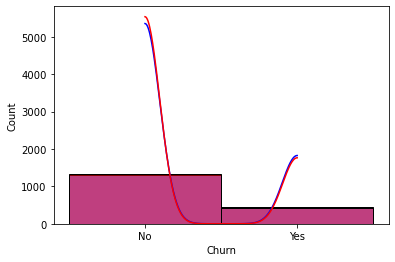

In [125]:
sns.histplot(y_test, color='blue', kde=True)
sns.histplot(y_test_pred, color='red', kde=True);

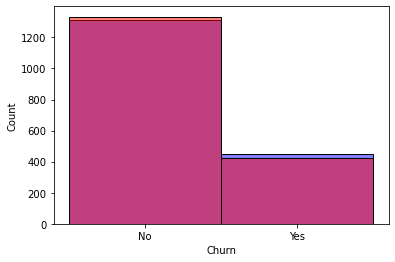

In [126]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);

### (b). LogisticRegression

In [127]:
%%time
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_transformed, y_train)

CPU times: total: 109 ms
Wall time: 69.9 ms


LogisticRegression()

In [128]:
y_test_pred = classifier.predict(X_test_transformed)

temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
temp_df.head(10)

,Actual,Predicted
5561,No,No
5814,No,No
2645,No,No
3983,Yes,Yes
6438,Yes,Yes
4561,No,No
6271,No,No
4081,Yes,Yes
3937,No,No
1357,No,No


In [129]:
# Calculating the accuracy of classifier
print(f"Accuracy of the classifier is: {accuracy_score(y_test,y_test_pred)}")

Accuracy of the classifier is: 0.8122866894197952


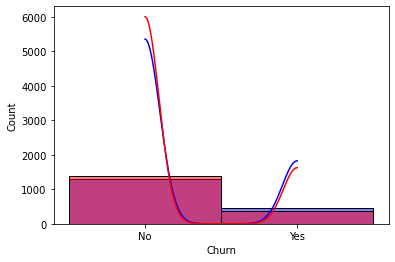

In [130]:
sns.histplot(y_test, color='blue', kde=True)
sns.histplot(y_test_pred, color='red', kde=True);

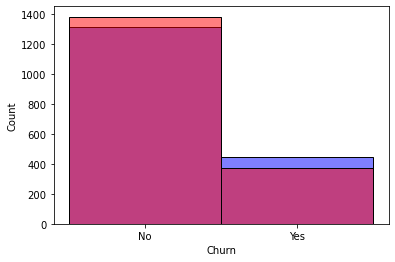

In [131]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);

### (c). SV classifier

In [132]:
%%time
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train_transformed, y_train)

CPU times: total: 1.44 s
Wall time: 1.49 s


SVC()

In [133]:
y_test_pred = classifier.predict(X_test_transformed)

temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
temp_df.head(10)

,Actual,Predicted
5561,No,No
5814,No,No
2645,No,No
3983,Yes,Yes
6438,Yes,Yes
4561,No,No
6271,No,No
4081,Yes,Yes
3937,No,No
1357,No,No


In [134]:
# Calculating the accuracy of classifier
print(f"Accuracy of the classifier is: {accuracy_score(y_test,y_test_pred)}")

Accuracy of the classifier is: 0.8077360637087599


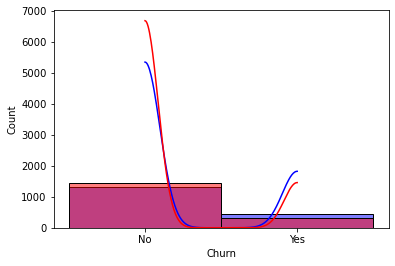

In [135]:
sns.histplot(y_test, color='blue', kde=True)
sns.histplot(y_test_pred, color='red', kde=True);

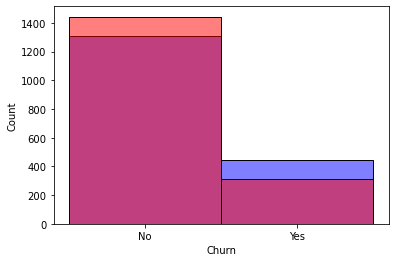

In [136]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);

### (d). DecisionTreeClassifier

In [137]:
%%time
from sklearn.tree import DecisionTreeClassifier   
classifier = DecisionTreeClassifier()
classifier.fit(X_train_transformed, y_train)

CPU times: total: 46.9 ms
Wall time: 46.6 ms


DecisionTreeClassifier()

In [138]:
y_test_pred = classifier.predict(X_test_transformed)

temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
temp_df.head(10)

,Actual,Predicted
5561,No,No
5814,No,No
2645,No,No
3983,Yes,No
6438,Yes,Yes
4561,No,No
6271,No,Yes
4081,Yes,Yes
3937,No,No
1357,No,No


In [139]:
# Calculating the accuracy of classifier
print(f"Accuracy of the classifier is: {accuracy_score(y_test,y_test_pred)}")

Accuracy of the classifier is: 0.7320819112627986


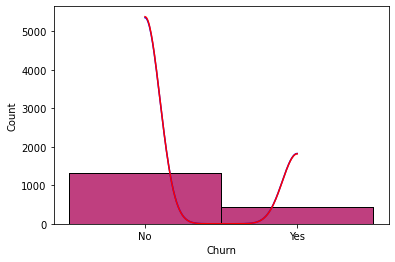

In [140]:
sns.histplot(y_test, color='blue', kde=True)
sns.histplot(y_test_pred, color='red', kde=True);

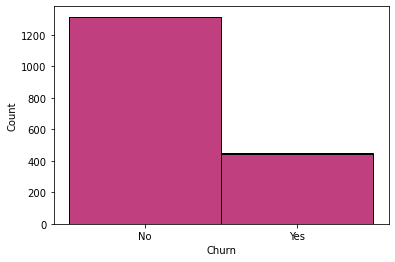

In [141]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);

### (e). RandomForestClassifier

In [142]:
%%time
from sklearn.ensemble import RandomForestClassifier    
classifier = RandomForestClassifier()
classifier.fit(X_train_transformed, y_train)

CPU times: total: 750 ms
Wall time: 763 ms


RandomForestClassifier()

In [143]:
y_test_pred = classifier.predict(X_test_transformed)

temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
temp_df.head(10)

,Actual,Predicted
5561,No,No
5814,No,No
2645,No,No
3983,Yes,No
6438,Yes,Yes
4561,No,No
6271,No,No
4081,Yes,Yes
3937,No,No
1357,No,No


In [144]:
# Calculating the accuracy of classifier
print(f"Accuracy of the classifier is: {accuracy_score(y_test,y_test_pred)}")

Accuracy of the classifier is: 0.7963594994311718


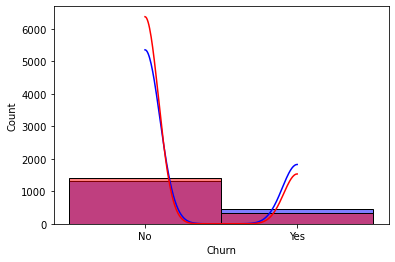

In [145]:
sns.histplot(y_test, color='blue', kde=True)
sns.histplot(y_test_pred, color='red', kde=True);

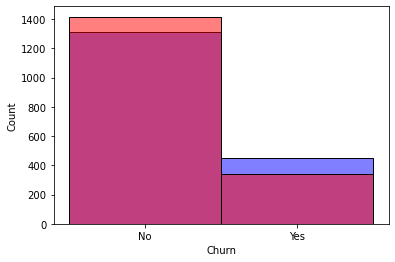

In [146]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);

In [155]:
df =  {'Classification_algorithm':[' KNN',' LogisticRegression','SV classifier ',
                        'DecisionTreeClassifier ','  RandomForestClassifier'],
      'Accuracy_of_the_classifier(%)': [0.759,0.812,0.80,0.721,0.791]}

Result = pd.DataFrame(df, columns = ['Classification_algorithm','Accuracy_of_the_classifier(%)'])
Result.sort_values(by = 'Classification_algorithm', ascending = True)

,Classification_algorithm,Accuracy_of_the_classifier(%)
4,RandomForestClassifier,0.791
0,KNN,0.759
1,LogisticRegression,0.812
3,DecisionTreeClassifier,0.721
2,SV classifier,0.800


<AxesSubplot:xlabel='Accuracy_of_the_classifier(%)', ylabel='Classification_algorithm'>

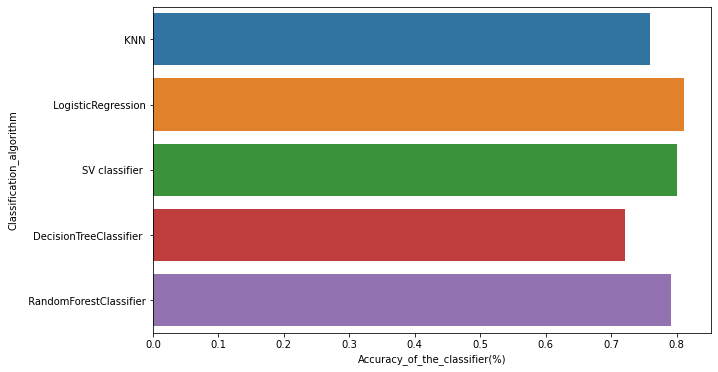

In [157]:
plt.figure(figsize = (10,6))
sns.barplot(y = Result['Classification_algorithm'], x = Result['Accuracy_of_the_classifier(%)'])

##  # Conclusion :

- We achieved the highest accuracy about **81.2%** for LogisticRegression. 
- Furthermore, came into the conclusion that the best algorithm to predict customer churn is **Logistic Regression**.

## # Data visualization based on telecom_churn data set

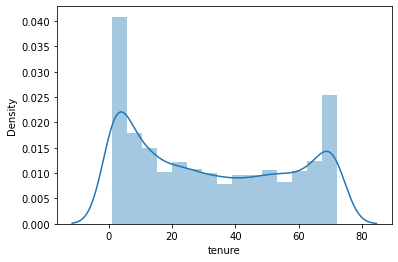

In [159]:
sns.distplot(telecom_churn.tenure)
plt.show()

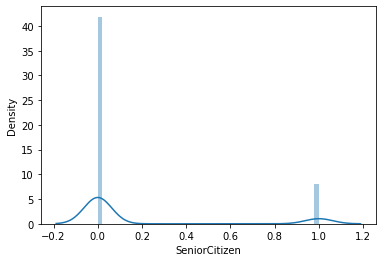

In [161]:
sns.distplot(telecom_churn.SeniorCitizen)
plt.show()

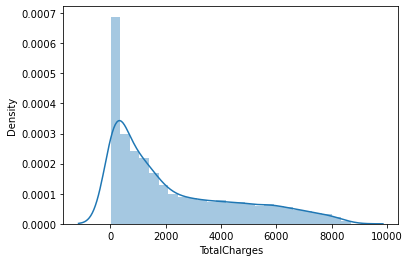

In [163]:
sns.distplot(telecom_churn.TotalCharges)
plt.show()

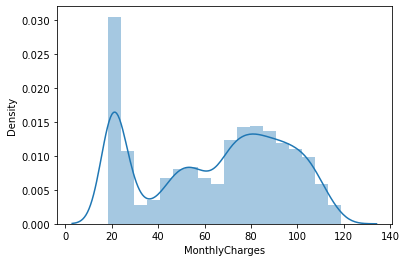

In [165]:
sns.distplot(telecom_churn.MonthlyCharges)
plt.show()

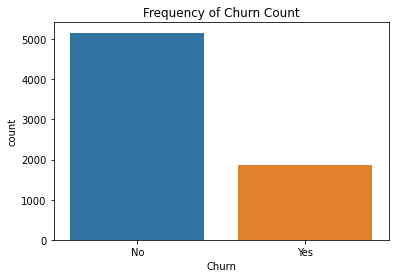

In [167]:
# Count plot
sns.countplot(x='Churn',data=telecom_churn)
plt.title("Frequency of Churn Count")
plt.show()

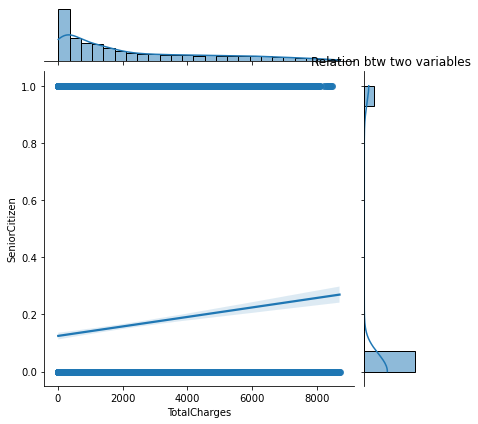

In [169]:
#JointPlot
sns.jointplot(x='TotalCharges',y='SeniorCitizen',data=telecom_churn,kind='reg')
plt.title("Relation btw two variables")
plt.show()

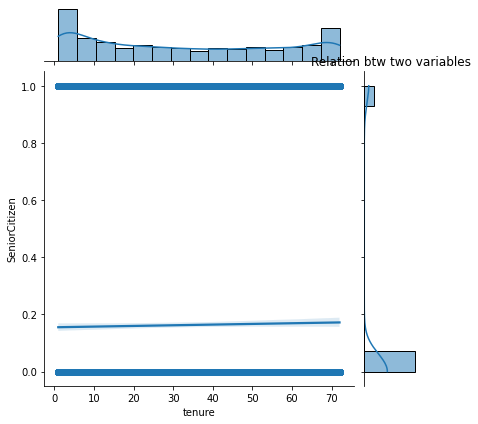

In [171]:
sns.jointplot(x='tenure',y='SeniorCitizen',data=telecom_churn,kind='reg')
plt.title("Relation btw two variables")
plt.show()

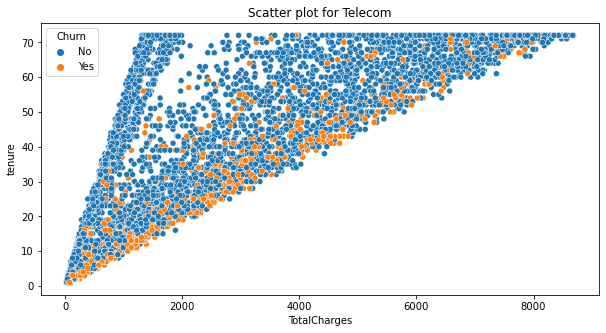

In [172]:
#ScatterPlot
plt.figure(figsize=(10,5))
sns.scatterplot(x='TotalCharges',y='tenure',data=telecom_churn,hue='Churn')
plt.title("Scatter plot for Telecom")
plt.show()

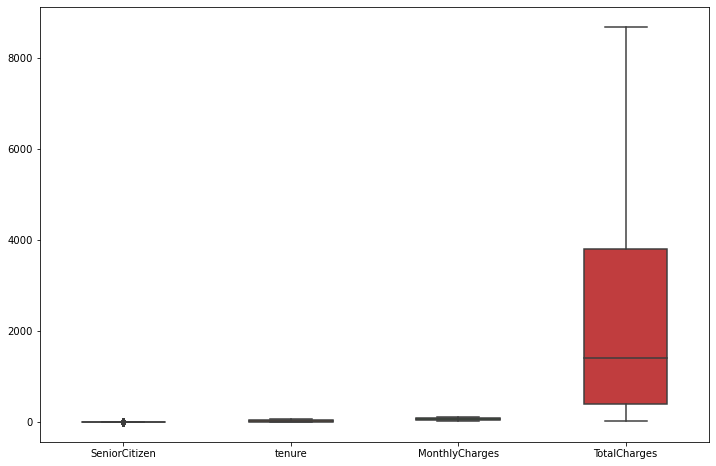

In [177]:
plt.figure(figsize=(12,8))
box_data = telecom_churn #variable representing the data array
box_target = telecom_churn.Churn #variable representing the labels array
sns.boxplot(data = box_data,width=0.5,fliersize=5);

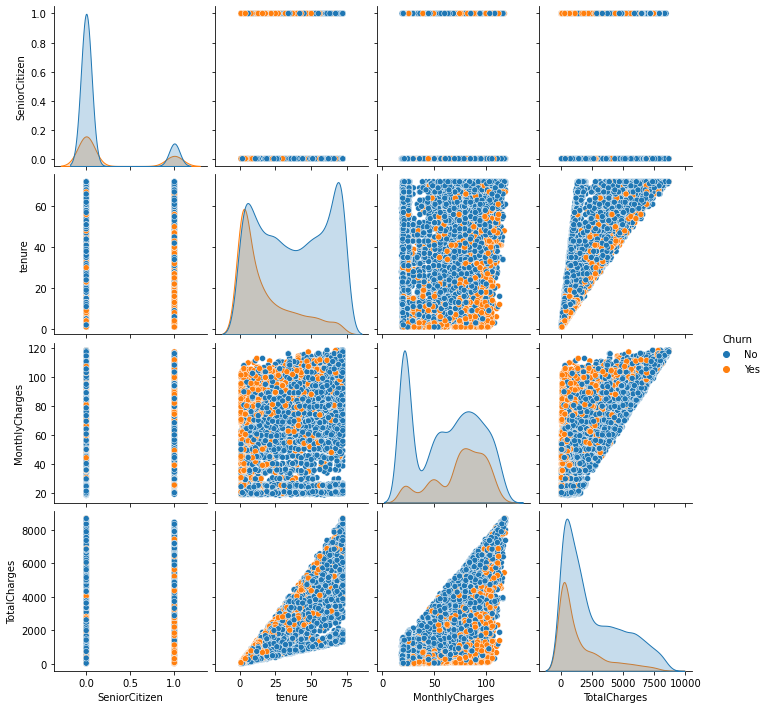

In [179]:
sns.pairplot(telecom_churn,hue='Churn') #PAIR PLOT IS USED ONLY TO THE FEW NUMERICALS VALUES ARE TO BE ANALYSED
plt.show()

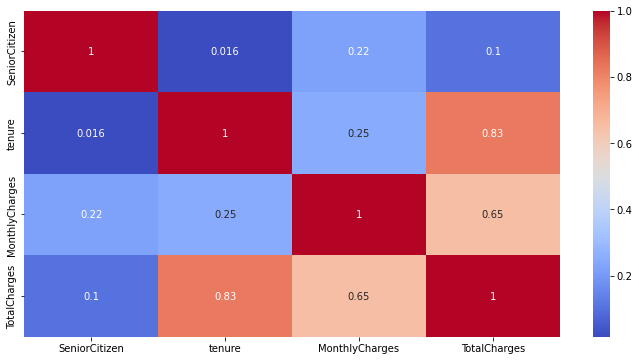

In [185]:
#Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(telecom_churn.corr(),annot=True, cbar=True, cmap='coolwarm');